# An Introductory Python Workflow: US Census Surname Data

This notebook provides working examples of many of the concepts introduced earlier:

* Importing modules or libraries to extend basic Python functionality
* Declaring and using variables
* Python data types and data structures
* Flow control

Using the 2010 surname data from the US Census, we will develop a workflow to accomplish the following:

1. Retrieve information about the dataset API
2. Retrieve data about a single surname
3. Output surname data in tabular form
4. Visualize surname data using a pie chart

## Sample dataset

_Decennial Census Surname Files (2010)_

[https://www.census.gov/data/developers/data-sets/surnames.html](https://www.census.gov/data/developers/data-sets/surnames.html)

[https://api.census.gov/data/2010/surname.html](https://api.census.gov/data/2010/surname.html)

#### Citation 

US Census Bureau (2016) _Decennial Census Surname Files (2010)_ Retrieved from [https://api.census.gov/data/2010/surname.json](https://api.census.gov/data/2010/surname.json)structures

----------------------------------------------------------------------------------------------------

## 1. Import modules

The modules used in this exercise are popular and under active development. Follow the links for more information about methods, syntax, etc.

**Requests:** [http://docs.python-requests.org/en/master/](http://docs.python-requests.org/en/master/)

**JSON:** [https://docs.python.org/3/library/json.html](https://docs.python.org/3/library/json.html)

**Pandas:** [http://pandas.pydata.org/](http://pandas.pydata.org/)

**Matplotlib:** [https://matplotlib.org/](https://matplotlib.org/)

Look for information about or links to the API, developer's documentation, etc. Helpful examples are often included.

Note that we are providing an alias for Pandas and matplotlib. Whenever we need to call a method from those module, we can use the alias. 

In [2]:
# http://api.census.gov/data/2010/surname
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

## 2. Basic interactions with the Census dataset API

### Combining data from two API endpoints into a human-readable table

The dataset in our example is not excessively large, so we can explore different approaches to interacting with it:

* Download some or all data to the computer we're using ('local'). Keep the data in memory and do stuff.
* Only download what we need when we need it. Doing stuff may require additional calls to the API.

Both have pros and cons. Both are used in the following examples.

### Some points of interest:

* The data are not provided in tabular form
* Human-readable variable names and definitions are stored separately from the data

In order to make a human readable table we need to:

1. Download variable definitions
2. Download data
3. Replace shorthand variable codes with human readable names
4. Reformat the data into a table

![Census API workflow](./images/census_api_workflow.png)

### Get API and variable information:

In [4]:
# First, get the basic info about the dataset.
# References: Dataset API (https://api.census.gov/data/2010/surname.html) 
#             Requests API (http://docs.python-requests.org/en/master/)
#             Python 3 JSON API (https://docs.python.org/3/library/json.html)

api_base_url = "http://api.census.gov/data/2010/surname"
api_info = requests.get(api_base_url) 
api_json = api_info.json() 

# Uncomment the next line(s) to see the response content.
# NOTE: JSON and TEXT don't look much different to us. They can look very different to a machine!
#print(api_info.text)
print(json.dumps(api_json, indent=4))

# The output is a dictionary - data are stored as key:value pairs and can be nested.

{
    "@context": "https://project-open-data.cio.gov/v1.1/schema/catalog.jsonld",
    "@id": "https://api.census.gov/data/2010/surname.json",
    "@type": "dcat:Catalog",
    "conformsTo": "https://project-open-data.cio.gov/v1.1/schema",
    "describedBy": "https://project-open-data.cio.gov/v1.1/schema/catalog.json",
    "dataset": [
        {
            "c_vintage": 2010,
            "c_dataset": [
                "surname"
            ],
            "c_geographyLink": "https://api.census.gov/data/2010/surname/geography.json",
            "c_variablesLink": "https://api.census.gov/data/2010/surname/variables.json",
            "c_examplesLink": "https://api.census.gov/data/2010/surname/examples.json",
            "c_groupsLink": "https://api.census.gov/data/2010/surname/groups.json",
            "c_valuesLink": "https://api.census.gov/data/2010/surname/values.json",
            "c_documentationLink": "http://www.census.gov/developer/",
            "c_isAggregate": true,
            "

In [5]:
# Request and store a local copy of the dataset variables. 
# Note that the URL could be hard coded just from referencing the API, but
#   we are navigating the JSON data.
var_link = api_json['dataset'][0]['c_variablesLink']
print(var_link)

https://api.census.gov/data/2010/surname/variables.json


In [8]:
# Use the variable info link to make a new request

variables = requests.get(var_link)
jsonData = variables.json()
variable_data = jsonData['variables']

# Note that this is a dictionary of dictionaries.
print(json.dumps(variable_data, indent=4))

{
    "PCTAPI": {
        "label": "Percent Non-Hispanic Asian and Native Hawaiian and Other Pacific Islander Alone",
        "concept": "Surnames Variables",
        "predicateType": "int",
        "group": "N/A",
        "limit": 0
    },
    "PCTBLACK": {
        "label": "Percent Non-Hispanic Black or African American Alone",
        "concept": "Surnames Variables",
        "predicateType": "int",
        "group": "N/A",
        "limit": 0
    },
    "PCTAIAN": {
        "label": "Percent Non-Hispanic American Indian and Alaska Native Alone",
        "concept": "Surnames Variables",
        "predicateType": "int",
        "group": "N/A",
        "limit": 0
    },
    "CUM_PROP100K": {
        "label": "Cumulative proportion per 100,000 population",
        "concept": "Surnames Variables",
        "predicateType": "int",
        "group": "N/A",
        "limit": 0
    },
    "PROP100K": {
        "label": "Proportion per 100,000 population for name",
        "concept": "Surnames Vari

In [9]:
print(variable_data.keys())

dict_keys(['PCTAPI', 'PCTBLACK', 'PCTAIAN', 'CUM_PROP100K', 'PROP100K', 'PCTWHITE', 'RANK', 'COUNT', 'PCT2PRACE', 'PCTHISPANIC', 'NAME'])


### Get surname data:

In [11]:
# References: Pandas (http://pandas.pydata.org/)

# Default vars: 'RANK,COUNT,PCTWHITE,PCTAPI,PCT2PRACE,PCTAIAN,PCTBLACK,PCTHISPANIC'
desired_vars = 'NAME,COUNT,PCTWHITE,PCTAPI,PCT2PRACE,PCTAIAN,PCTBLACK,PCTHISPANIC&RANK=1:10'     # Top ten names

base_url = 'http://api.census.gov/data/2010/surname?get='
query_url = base_url + desired_vars
name_stats = requests.get(query_url)
surname_data = name_stats.json()

# The response data are not very human readable.
# Note that this is a list of lists. Data within lists are typically accessed by position number. (There are no keys.)
print('Raw response data:\n')
print(json.dumps(surname_data, indent=4))

Raw response data:

[
    [
        "NAME",
        "COUNT",
        "PCTWHITE",
        "PCTAPI",
        "PCT2PRACE",
        "PCTAIAN",
        "PCTBLACK",
        "PCTHISPANIC",
        "RANK"
    ],
    [
        "BROWN",
        "1437026",
        "57.95",
        "0.51",
        "2.55",
        "0.87",
        "35.6",
        "2.52",
        "4"
    ],
    [
        "DAVIS",
        "1116357",
        "62.2",
        "0.49",
        "2.45",
        "0.82",
        "31.6",
        "2.44",
        "8"
    ],
    [
        "GARCIA",
        "1166120",
        "5.38",
        "1.41",
        "0.26",
        "0.47",
        "0.45",
        "92.03",
        "6"
    ],
    [
        "JOHNSON",
        "1932812",
        "58.97",
        "0.54",
        "2.56",
        "0.94",
        "34.63",
        "2.36",
        "2"
    ],
    [
        "JONES",
        "1425470",
        "55.19",
        "0.44",
        "2.61",
        "1",
        "38.48",
        "2.29",
        "5"
    ],
    [

Laying out the API response like a table helps illustrate what we're doing here. For easier reading the "surname_data" variable has been replace with "d" in the image below.

The variable codes in d[0] will be replaced with human readable descriptions from the variable list (v).

![Census API result as a table](./images/census_api_result-as-table.png)

### Replace variable codes with human readable labels

In [16]:
# Pass the data to a Pandas dataframe. 
# In addition to being easier to read, dataframes simplify further analysis.

# The simplest dataframe would use the variable names returned with the data. Example: PCTWHITE
# It's easier to read the descriptive labels provide via the variables API.
# The code block below replaces variable names with labels as it builds the dataframe.
column_list = []

for each in surname_data[0]:                        # For each variable in the response data (stored as surname_data[0])
    label = variable_data[each]['label']            #     look up that variable's label in the variable dictionary
    column_list.append(label)                       #     add the variable's label to the list of column headers
    print(each, ":", label)

print('\n', column_list)

NAME : Surname
COUNT : Frequency: number of occurrences nationally
PCTWHITE : Percent Non-Hispanic White Alone
PCTAPI : Percent Non-Hispanic Asian and Native Hawaiian and Other Pacific Islander Alone
PCT2PRACE : Percent Non-Hispanic Two or More Races
PCTAIAN : Percent Non-Hispanic American Indian and Alaska Native Alone
PCTBLACK : Percent Non-Hispanic Black or African American Alone
PCTHISPANIC : Percent Hispanic or Latino origin
RANK : National Rank

 ['Surname', 'Frequency: number of occurrences nationally', 'Percent Non-Hispanic White Alone', 'Percent Non-Hispanic Asian and Native Hawaiian and Other Pacific Islander Alone', 'Percent Non-Hispanic Two or More Races', 'Percent Non-Hispanic American Indian and Alaska Native Alone', 'Percent Non-Hispanic Black or African American Alone', 'Percent Hispanic or Latino origin', 'National Rank']


### Create a dataframe (table) with variable labels as column names and append data

In [31]:
df = pd.DataFrame([surname_data[1]], columns=column_list)  # Create a dataframe using the column names created above. Data
                                                           # for the dataframe comes from rows 2-10 (positions 1-9) 
                                                           # of surname_data.

# The table we just created is empty. Here we add the surname data:
for surname in d[2:]:
    tdf = pd.DataFrame([surname], columns=column_list)
    df = df.append(tdf)

print('\n\nPandas dataframe:')
df.sort_values(by=["National Rank"])



Pandas dataframe:


,Surname,Frequency: number of occurrences nationally,Percent Non-Hispanic White Alone,Percent Non-Hispanic Asian and Native Hawaiian and Other Pacific Islander Alone,Percent Non-Hispanic Two or More Races,Percent Non-Hispanic American Indian and Alaska Native Alone,Percent Non-Hispanic Black or African American Alone,Percent Hispanic or Latino origin,National Rank
0,SMITH,2442977,70.9,0.5,2.19,0.89,23.11,2.4,1
0,MARTINEZ,1060159,5.28,0.6,0.22,0.51,0.49,92.91,10
0,JOHNSON,1932812,58.97,0.54,2.56,0.94,34.63,2.36,2
0,WILLIAMS,1625252,45.75,0.46,2.81,0.82,47.68,2.49,3
0,BROWN,1437026,57.95,0.51,2.55,0.87,35.6,2.52,4
0,JONES,1425470,55.19,0.44,2.61,1,38.48,2.29,5
0,GARCIA,1166120,5.38,1.41,0.26,0.47,0.45,92.03,6
0,MILLER,1161437,84.11,0.54,1.77,0.66,10.76,2.17,7
0,DAVIS,1116357,62.2,0.49,2.45,0.82,31.6,2.44,8
0,RODRIGUEZ,1094924,4.75,0.57,0.18,0.18,0.54,93.77,9


### Exercises

1. Change the table to include the 50 most common surnames. Alternatively, create a table for the 11th - 20th most common surnames.
2. Sort the output table by surname or a demographic.
3. Change the request/table to include only surname, rank, and count. 
4. Correct the sort order in the example table.

## 3. Download and tabulate statistics for a given surname

Now let's find out the rank and demographic breakdown of a particular name.

To make it easy to change the name we're looking up, assign it to a variable.

In [23]:
# Try 'STEUBEN' in order to break the first pie chart example.
# Update 2020-02-26: Surnames should be all caps!
name = 'WHEELER'
name_query = '&NAME=' + name

Referring to the variables API, decide which variables are of interest and edit accordingly.

In [24]:
# Default vars: 'RANK,COUNT,PCTWHITE,PCTAPI,PCT2PRACE,PCTAIAN,PCTBLACK,PCTHISPANIC'
desired_vars = 'RANK,COUNT,PCTWHITE,PCTAPI,PCT2PRACE,PCTAIAN,PCTBLACK,PCTHISPANIC'

Build the query URL and send the request. Pass the response data into a Pandas dataframe for viewing.

In [25]:
# References: Pandas (http://pandas.pydata.org/)

base_url = 'http://api.census.gov/data/2010/surname?get='
query_url = base_url + desired_vars + name_query
name_stats = requests.get(query_url)
d = name_stats.json()

# The response data are not very human readable.
print('Raw response data:\n')
print(d)

# Pass the data to a Pandas dataframe. 
# In addition to being easier to read, dataframes simplify further analysis.

# The simplest dataframe would use the variable names returned with the data. Example: PCTWHITE
# It's easier to read the descriptive labels provide via the variables API.
# The code block below replaces variable names with labels as it builds the dataframe.
column_list = []

for each in d[0]:                                   # For each variable in the response data (stored as d[0])
    label = v[each]['label']                        #     look up that variable's label in the variable dictionary
    column_list.append(label)                       #     add the variable's label to the list of column headers

df = pd.DataFrame([d[1]], columns=column_list)      # Create a dataframe using the column names created above. Data
                                                    # for the dataframe comes from d[1]

print('\n\nPandas dataframe:')
df

Raw response data:

[['RANK', 'COUNT', 'PCTWHITE', 'PCTAPI', 'PCT2PRACE', 'PCTAIAN', 'PCTBLACK', 'PCTHISPANIC', 'NAME'], ['243', '125058', '80.96', '0.5', '1.97', '0.93', '13.29', '2.35', 'WHEELER']]


Pandas dataframe:


,National Rank,Frequency: number of occurrences nationally,Percent Non-Hispanic White Alone,Percent Non-Hispanic Asian and Native Hawaiian and Other Pacific Islander Alone,Percent Non-Hispanic Two or More Races,Percent Non-Hispanic American Indian and Alaska Native Alone,Percent Non-Hispanic Black or African American Alone,Percent Hispanic or Latino origin,Surname
0,243,125058,80.96,0.5,1.97,0.93,13.29,2.35,WHEELER


## 4. Create a name demographic pie-chart

In [26]:
# Using index positions is good for doing something quick, but in this case makes code easy to break.
# Selecting different surname dataset variables or re-ordering variables will result in errors.
print(d)
pcts = d[1][2:8]
print('\n\n',pcts)

[['RANK', 'COUNT', 'PCTWHITE', 'PCTAPI', 'PCT2PRACE', 'PCTAIAN', 'PCTBLACK', 'PCTHISPANIC', 'NAME'], ['243', '125058', '80.96', '0.5', '1.97', '0.93', '13.29', '2.35', 'WHEELER']]


 ['80.96', '0.5', '1.97', '0.93', '13.29', '2.35']


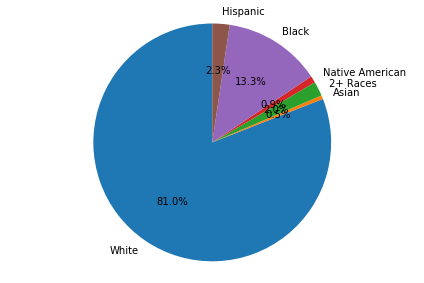

In [27]:
# Create the labels and get the data for the pie chart.
# Note that we are using the downloaded source data, not the dataframe
#     used for the table above.
labels = ['White', 'Asian', '2+ Races', 'Native American', 'Black', 'Hispanic']
pcts = d[1][2:8]
#print(pcts)

# Create a pie chart (https://matplotlib.org/2.0.2/examples/pie_and_polar_charts/pie_demo_features.html)
plt.pie(
    # using data percentages
    pcts,
    # Use labels defined above
    labels=labels,
    # with no shadows
    shadow=False,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## 5. Fix the data type error

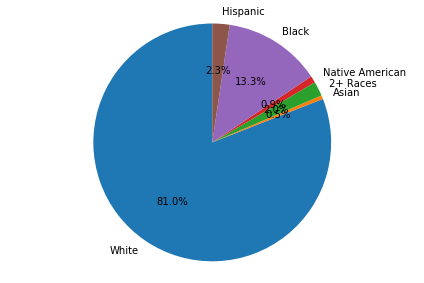

In [28]:
# First try - just replace string with a zero.
# Here, the for loop iterates through items in a list.
pcts2 = []
for p in pcts:
    if p != '(S)':
        pcts2.append(p)
    else:
        pcts2.append(0)

# Create a pie chart (https://matplotlib.org/2.0.2/examples/pie_and_polar_charts/pie_demo_features.html)
plt.pie(
    # using data percentages
    pcts2,
    # Use labels defined above
    labels=labels,
    # with no shadows
    shadow=False,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

80.96
0.5
1.97
0.93
13.29
2.35


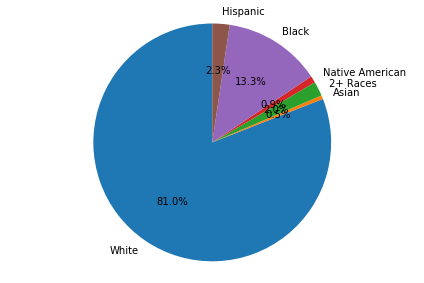

In [29]:
# Second try - exclude and corresponding label if source data for a given demographic == (S)
# This requires the list index of the data and the label.
# The for loop in this case iterates across a range of integers equal to the length of the list.
pcts3 = []
edit_labels = []
for i in range(len(pcts)):
    print(pcts[i])
    if pcts[i] != '(S)':
        pcts3.append(pcts[i])
        edit_labels.append(labels[i])
    else:
        pass

# Create a pie chart (https://matplotlib.org/2.0.2/examples/pie_and_polar_charts/pie_demo_features.html)
plt.pie(
    # using data percentages
    pcts3,
    # Use labels defined above
    labels=edit_labels,
    # with no shadows
    shadow=False,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## Exercises

1. Look up and produce the demographic pie charts for your name or other names of interest.
2. Change the variables displayed in the dataframe.
2. Change the order of variables displayed in the dataframe.
3. Referring to the documentation, edit the pie chart parameters.